## Часть 2. Обучение нейросети и расчет ее качества.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import * 
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import cv2
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.optimizers import Adam
import csv
import random

In [4]:
fonts_sample = pd.read_csv('fonts_sample.csv')
fonts_sample = fonts_sample['Font'].tolist()
print('\u001b[38;5;19m', 'Выведем список используемых шрифтов:', '\u001b[0m')
for i in sorted(fonts_sample):
    print('\u001b[38;5;19m', i, '\u001b[0m')

 Выведем список используемых шрифтов: 
 Aguante 
 Alumni Sans Collegiate One Italic 
 Alumni Sans Collegiate One Regular 
 Ambidexter 
 Aref Ruqaa Ink Bold 
 Aref Ruqaa Ink Regular 
 BRASS MONO Bold 
 BRASS MONO Bold Italic 
 BRASS MONO Bold Regular 
 BRASS MONO Italic 
 Better VCR 5.2 
 Ganesha Type Regular 
 Ghastly Panic 
 Realest Extended 
 Tana Uncial SP 


**По результатам первой части иследования получены изображения букв и символов предоставленных шрифтов. Присутствуют малозначимые символы изображения которых могут не идентифицироваться с конкретным шрифтом. Использование их при построении модели приведет к неточностям. Создадим список наименований этих символов и удалим их из данных для обучения.**

In [5]:
excess_index=[]
excess_foto = [410, 488, 566, 644, 732, 973, 974, 988]
for  i in excess_foto:
    excess_index.append(i-1)

In [6]:
excess_foto = [[26,43], [55,69], [132,142], [209,224], [288,298], [300,304], [341,358],  [395,408], [472,486], [550,564], 
               [628,642], [706,710], [712,718], [724,726], [785,799], [838, 852], [881,884], [893,898], [901,910], [973,986]]
for  i in excess_foto:
    for n in range(i[0]-1, i[1]):
        excess_index.append(n)

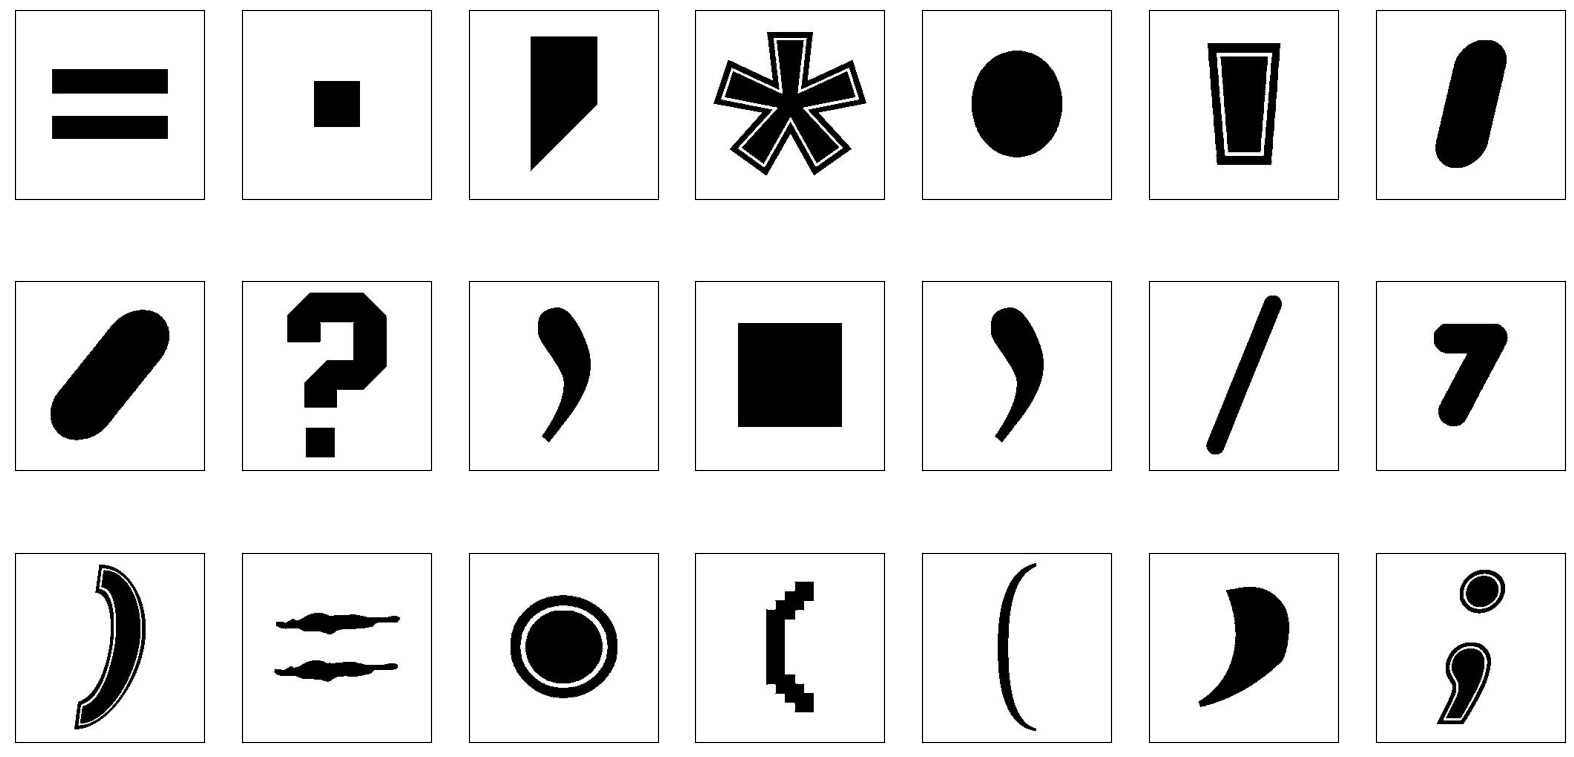

In [7]:
plt.figure(figsize=(20,10))
for i in range(21):
    num = random.choice(excess_index)
    image_path = 'fonts_sample_img/'+str(num+1)+'.jpg'
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.subplot(3,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img, cmap='gray')

In [8]:
df_fonts = pd.read_csv('df_fonts.csv')
display(df_fonts.head(10).style.background_gradient(cmap='Blues', axis=0))

,Letter,Font
0,1.jpg,Aguante
1,2.jpg,Aguante
2,3.jpg,Aguante
3,4.jpg,Aguante
4,5.jpg,Aguante
5,6.jpg,Aguante
6,7.jpg,Aguante
7,8.jpg,Aguante
8,9.jpg,Aguante
9,10.jpg,Aguante


In [9]:
data = df_fonts['Font']
data = data.drop(index=excess_index)
images_list = []
for i in range(0, len(df_fonts)):
    if i not in excess_index:
        img_path = 'fonts_sample_img/'+str(i+1)+'.jpg'
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        images_list.append(img)
    else:
        continue

In [10]:
display(data.value_counts().to_frame().style.background_gradient(cmap='Blues', axis=0))

,Font
Alumni Sans Collegiate One Regular,66
Realest Extended,64
Ambidexter,63
Better VCR 5.2,63
BRASS MONO Bold,62
BRASS MONO Bold Italic,62
Alumni Sans Collegiate One Italic,62
BRASS MONO Bold Regular,62
BRASS MONO Italic,62
Ganesha Type Regular,38


In [11]:
X = np.array(images_list)/255
X = X.astype('float64')

In [12]:
data = data.reset_index()
del data['index']

In [13]:
encoder = OneHotEncoder(handle_unknown='ignore') 
encoder_df = pd.DataFrame(encoder.fit_transform(data[['Font']]).toarray())
data_df = data.join(encoder_df)
data_df.drop('Font', axis=1, inplace= True )

In [14]:
data_new = data_df.values

In [15]:
(X_train, X_test, y_train, y_test) = train_test_split(X, data_new, test_size=0.20, random_state=42)

In [16]:
model = Sequential([
    Flatten(input_shape=(256, 256)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(15, activation='softmax')
])
lr=0.01
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 65536)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               8388736   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 15)                975       
Total params: 8,397,967
Trainable params: 8,397,967
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
history = model.fit(X_train, y_train,
          epochs=100,
          validation_data=(X_test, y_test))

Epoch 1/100
20/20 [==============================] - 1s 46ms/step - loss: 36.8128 - accuracy: 0.0848 - val_loss: 12.1414 - val_accuracy: 0.1146
Epoch 2/100
20/20 [==============================] - 1s 34ms/step - loss: 10.4882 - accuracy: 0.1807 - val_loss: 6.6291 - val_accuracy: 0.2293
Epoch 3/100
20/20 [==============================] - 1s 35ms/step - loss: 4.9632 - accuracy: 0.3621 - val_loss: 5.1174 - val_accuracy: 0.3312
Epoch 4/100
20/20 [==============================] - 1s 34ms/step - loss: 2.9877 - accuracy: 0.4589 - val_loss: 3.4803 - val_accuracy: 0.3631
Epoch 5/100
20/20 [==============================] - 1s 35ms/step - loss: 2.6575 - accuracy: 0.4673 - val_loss: 2.6561 - val_accuracy: 0.3248
Epoch 6/100
20/20 [==============================] - 1s 35ms/step - loss: 1.6371 - accuracy: 0.5504 - val_loss: 3.6506 - val_accuracy: 0.4204
Epoch 7/100
20/20 [==============================] - 1s 34ms/step - loss: 1.3544 - accuracy: 0.6798 - val_loss: 2.3420 - val_accuracy: 0.5032
Epo

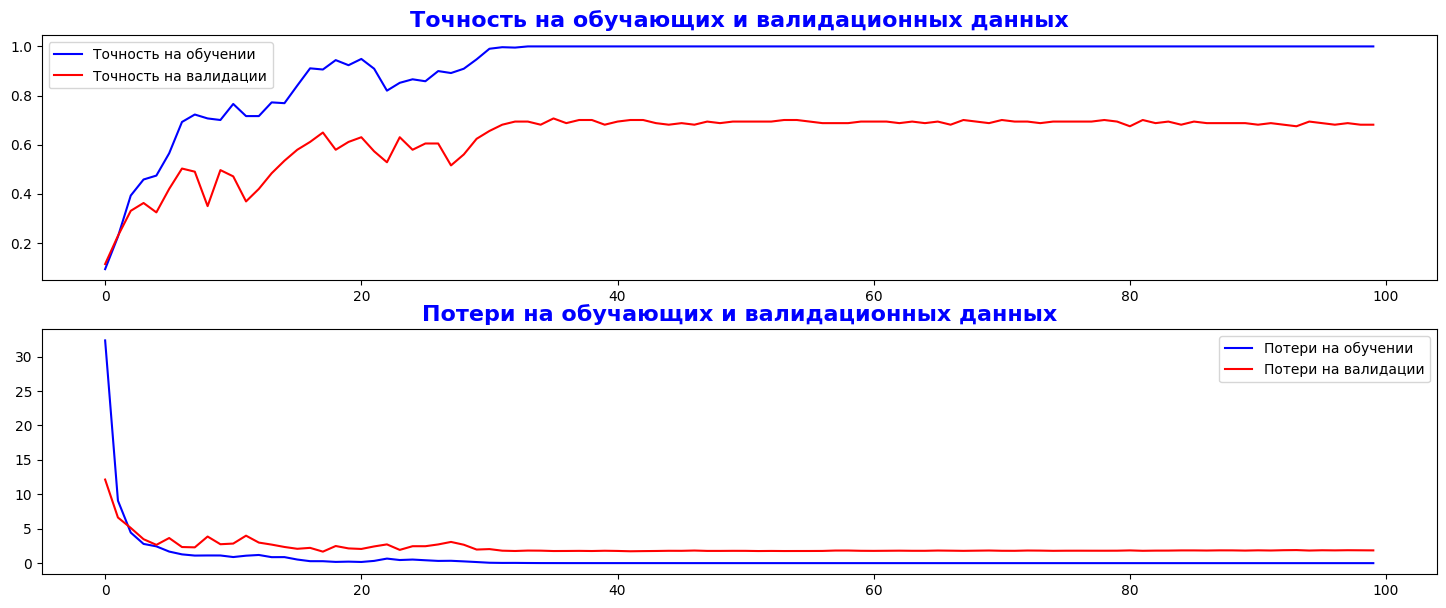

In [18]:
plt.figure(figsize=(18, 7))
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label = 'Точность на обучении', color='blue')
plt.plot(history.history['val_accuracy'], label = 'Точность на валидации', color='red')
plt.legend()
plt.title('Точность на обучающих и валидационных данных', fontsize=16, fontweight="bold", color='blue')

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label = 'Потери на обучении', color='blue')
plt.plot(history.history['val_loss'], label = 'Потери на валидации', color='red')
plt.legend()
plt.title('Потери на обучающих и валидационных данных', fontsize=16, fontweight="bold", color='blue')
plt.show()

In [19]:
model.save('model_kvant_1.h5')

In [20]:
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

In [21]:
with open('data_loss.csv', 'a') as csv_file: 
    writer = csv.writer(csv_file) 
    writer.writerow(loss)

In [22]:
with open('data_val_loss.csv', 'a') as csv_file: 
    writer = csv.writer(csv_file) 
    writer.writerow(val_loss)

In [23]:
print('\u001b[38;5;19m', 'Точность на обучении max (accuracy) =', round(max(accuracy), 2), '\u001b[0m')

 Точность на обучении max (accuracy) = 1.0 


In [24]:
print('\u001b[38;5;19m', 'Точность на валидации max (accuracy) =', round(max(val_accuracy), 2), '\u001b[0m')

 Точность на валидации max (accuracy) = 0.71 


**Можно заметить на графиках, что точность на тренировочном и валидационном наборах данных различаются на достаточно большое значение, и наша модель достигла относительной точности на валидационном наборе данных. Этот разрыв между точностью обучения и точностью тестирования является примером переобучения. В дальнейшем мы будем рапознавать текст состоящий из достаточного количества букв. Если для более половины букв будет распознан шрифт, но мы приним это как распознавание всего текста. Этим мы можем компенсировать точность модели.**